# Common Pull Request Contributors across different categories in AI/ML space

## Tables of Contents
- [Introduction](#introduction)
- [Database Connection](#connect-to-the-augur-database)
- [Loading the URLs of Repositories](#load-the-urls-of-ai-repositories)
- [Math Repositories](#math-respositories)
  - [Network Graph](#math-repositories-networkx-graph)
  - [Plotly Graph](#math-repositories-plotly-graph)
  - [Takeaways](#takeaways---math-category)
- [Natural Language Processing (NLP) Repositories](#natural-language-processing-respositories)
  - [Network Graph](#nlp-repositories-networkx-graph)
  - [Plotly Graph](#nlp-repositories-plotly-graph)
  - [Takeaways](#takwaways---nlp-category)
- [Personal Assistant Repositories](#personal-assistant-repositories)
  - [Network Graph](#personal-assistants-repositories-networkx-graph)
  - [Plotly Graph](#personal-assistant-repositories-plotly-graph)
  - [Takeaways](#takwaways---personal-assistants-category)
- [Large Language Model (LLMs) Repositories](#large-language-models-repositories)
  - [Network Graph](#llm-repositories-networkx-graph)
  - [Plotly Graph](#llm-repositories-plotly-graph)
  - [Takeaways](#takwaways---llms-category)
- [Generative Artificial Intelligence (GenAI) Repositories](#generative-ai-repositories)
  - [Network Graph](#genai-repositories-networkx-graph)
  - [Plotly Graph](#genai-repositories-plotly-graph)
  - [Takeaways](#takwaways---genai-category)
- [Combining All Repositories](#combining-all-categories)
  - [Network Graph](#all-category-repositories-networkx-graph)
  - [Plotly Graph](#all-category-repositories-plotly-graph)
  - [Takeaways](#takeaways-from-the-combination-of-all-categories)
- [Final Takeaways](#takeaways)

## Introduction

## Background
- In the previous notebook [repo_analysis](repo_analysis.ipynb), we plotted graphs by representing both projects and contributors as nodes and saw the relationships between them. To check all the libaries that are being used in this notebook, please check the list of [AI Repos](ai_repos.json).
The list of repositories are manually selected based on the popularity or most commonly used. And the Pull Request Contributions data is gathered using the Augur Database.
- In the laster section of the same notebook, as a proof of concept, we plotted graphs to see the Pull Request common contributors for the math category and observed what repositories have strong connection in terms of common contributors.

### In this notebook, we will extend the work by visualizing the common pull request contributors of the all categories we defined in the field of AI/ML. 

Specifically, we have categorized the repositories into five distinct groups:
- **Mathematics (math)**: This category includes libraries that are foundational for numerical computations, data manipulation, and mathematical operations essential in AI/ML pipelines. Examples include NumPy, TensorFlow, and PyTorch.

- **Natural Language Processing (NLP)**: NLP libraries focus on processing and understanding human language. They provide tools for tasks like tokenization, translation, and sentiment analysis. Notable libraries in this category are Hugging Face’s Transformers, SpaCy, and NLTK.

- **Large Language Models (LLMs)**: This category features libraries and frameworks related to the development and fine-tuning of large-scale language models. Examples include Mistral, Microsoft’s DeepSpeed, and Gemma.

- **Generative AI (gen_ai)**: These libraries focus on creating new content, including text, images, and code. This category includes repositories like LangChain, NVIDIA’s NeMo, and Stable Diffusion.

- **Personal Assistants**: This category includes frameworks that enable the creation of voice-based personal assistants, such as Mycroft, Rhasspy, and Leon.

Import all the necessary libraries.

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the json module to work with JSON data
import json

# Importing specific functions from SQLAlchemy
from sqlalchemy import create_engine

# Importing display module to show the plots after saving using Image 
from IPython.display import Image

# Importing itertools to work with dictionaries  
from itertools import islice

from utils.utils import fetch_repo_ids_and_names, fetch_pr_contributors, get_melted_df, get_contributor_graph, get_common_contributors_count, get_repo_common_contributors, get_plotly_graph, plot_networkx_graph, get_repo_pairs_with_highest_common_contributors

## Connect to the Augur database

In [2]:
# Opening the JSON file containing database credentials and loading it into a dictionary
with open("data/il_ai_creds.json") as config_file:
    config = json.load(config_file)
    
# Creating a PostgreSQL database connection string using the credentials from the JSON file
database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(
    config['user'],        # Username
    config['password'],    # Password
    config['host'],        # Hostname
    config['port'],        # Port number
    config['database']     # Database name
)

# Assigning the connection string to a variable
connection_string = database_connection_string

# Creating a SQLAlchemy engine using the connection string
engine = create_engine(connection_string)


## Load the URLs of AI repositories

- There are different verticals like math, nlp, gen_ai, personal_assistants, llm etc
- In this notebook, we are performing our analysis on each of the repositories as graphical interpretation.
- If you want to perform the same analysis on other verticals, just replace math with your choice in `data.get('math')`

In [3]:
# Opening the JSON file containing AI repository data and loading it into a dictionary
f = open('ai_repos.json')
data = json.load(f)

# Closing the file after loading the data
f.close()  

# print the collected repositories
from pprint import pprint
pprint(data)


{'gen_ai': ['https://github.com/lucidrains/imagen-pytorch',
            'https://github.com/langchain-ai/langchain',
            'https://github.com/run-llama/llama_index',
            'https://github.com/microsoft/lora',
            'https://github.com/nvidia/nemo',
            'https://github.com/huggingface/peft',
            'https://github.com/microsoft/semantic-kernel',
            'https://github.com/chroma-core/chroma',
            'https://github.com/milvus-io/milvus',
            'https://github.com/qdrant/qdrant',
            'https://github.com/bigscience-workshop/promptsource',
            'https://github.com/automatic1111/stable-diffusion-webui'],
 'llm': ['https://github.com/huggingface/transformers',
         'https://github.com/huggingface/datasets',
         'https://github.com/huggingface/trl',
         'https://github.com/microsoft/deepspeed',
         'https://github.com/timdettmers/bitsandbytes',
         'https://github.com/mistralai/mistral-common',
         'ht

## Math Respositories

In [4]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('math')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [5]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25495, 25498, 25497, 25501, 25500, 25504, 25503, 25557, 25502, 25499]
['numpy', 'tensorflow', 'networkx', 'pytorch', 'keras-io', 'tinygrad', 'pandas', 'polars', 'arrow', 'mlx']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [6]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25495,numpy,https://github.com/numpy/numpy,01000180-1a00-0000-0000-000000000000,145407
1,25495,numpy,https://github.com/numpy/numpy,0100c1fe-eb00-0000-0000-000000000000,145434
2,25495,numpy,https://github.com/numpy/numpy,010160db-fd00-0000-0000-000000000000,145460
3,25495,numpy,https://github.com/numpy/numpy,01007897-6600-0000-0000-000000000000,145437
4,25495,numpy,https://github.com/numpy/numpy,0100067d-2c00-0000-0000-000000000000,230310
...,...,...,...,...,...
213147,25499,mlx,https://github.com/ml-explore/mlx,0100178a-9500-0000-0000-000000000000,5178423
213148,25499,mlx,https://github.com/ml-explore/mlx,010012f3-bb00-0000-0000-000000000000,5178425
213149,25499,mlx,https://github.com/ml-explore/mlx,0100178a-9500-0000-0000-000000000000,5178427
213150,25499,mlx,https://github.com/ml-explore/mlx,0100178a-9500-0000-0000-000000000000,5178428


In [7]:
df_melted_pr = get_melted_df(pr_contrib)

In [8]:
df_melted_pr.head()

,repo_name,cntrb_id,number
8,tensorflow,01000000-5000-0000-0000-000000000000,3
16,polars,01000000-8900-0000-0000-000000000000,18
26,polars,01000001-fd00-0000-0000-000000000000,1
30,arrow,01000002-3300-0000-0000-000000000000,55
48,tensorflow,01000002-5600-0000-0000-000000000000,3


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [9]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [10]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 15):
    print(key, value)

01000000-5000-0000-0000-000000000000 ['tensorflow']
01000000-8900-0000-0000-000000000000 ['polars']
01000001-fd00-0000-0000-000000000000 ['polars']
01000002-3300-0000-0000-000000000000 ['arrow']
01000002-5600-0000-0000-000000000000 ['tensorflow']
01000002-8100-0000-0000-000000000000 ['pandas']
01000004-6200-0000-0000-000000000000 ['tensorflow']
01000004-c700-0000-0000-000000000000 ['pandas']
01000004-ca00-0000-0000-000000000000 ['networkx']
01000004-e100-0000-0000-000000000000 ['numpy']
01000005-2200-0000-0000-000000000000 ['pytorch']
01000006-8000-0000-0000-000000000000 ['pytorch', 'tensorflow']
01000006-8600-0000-0000-000000000000 ['tinygrad']
01000006-af00-0000-0000-000000000000 ['numpy']
01000006-cb00-0000-0000-000000000000 ['numpy']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [11]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [12]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('pytorch', 'tensorflow') 362
('arrow', 'pandas') 122
('pandas', 'pytorch') 133
('pandas', 'tinygrad') 7
('pytorch', 'tinygrad') 25


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [13]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('pytorch', 'tensorflow', 362), ('arrow', 'pandas', 122), ('pandas', 'pytorch', 133), ('pandas', 'tinygrad', 7), ('pytorch', 'tinygrad', 25)]


### Math Repositories: Networkx Graph

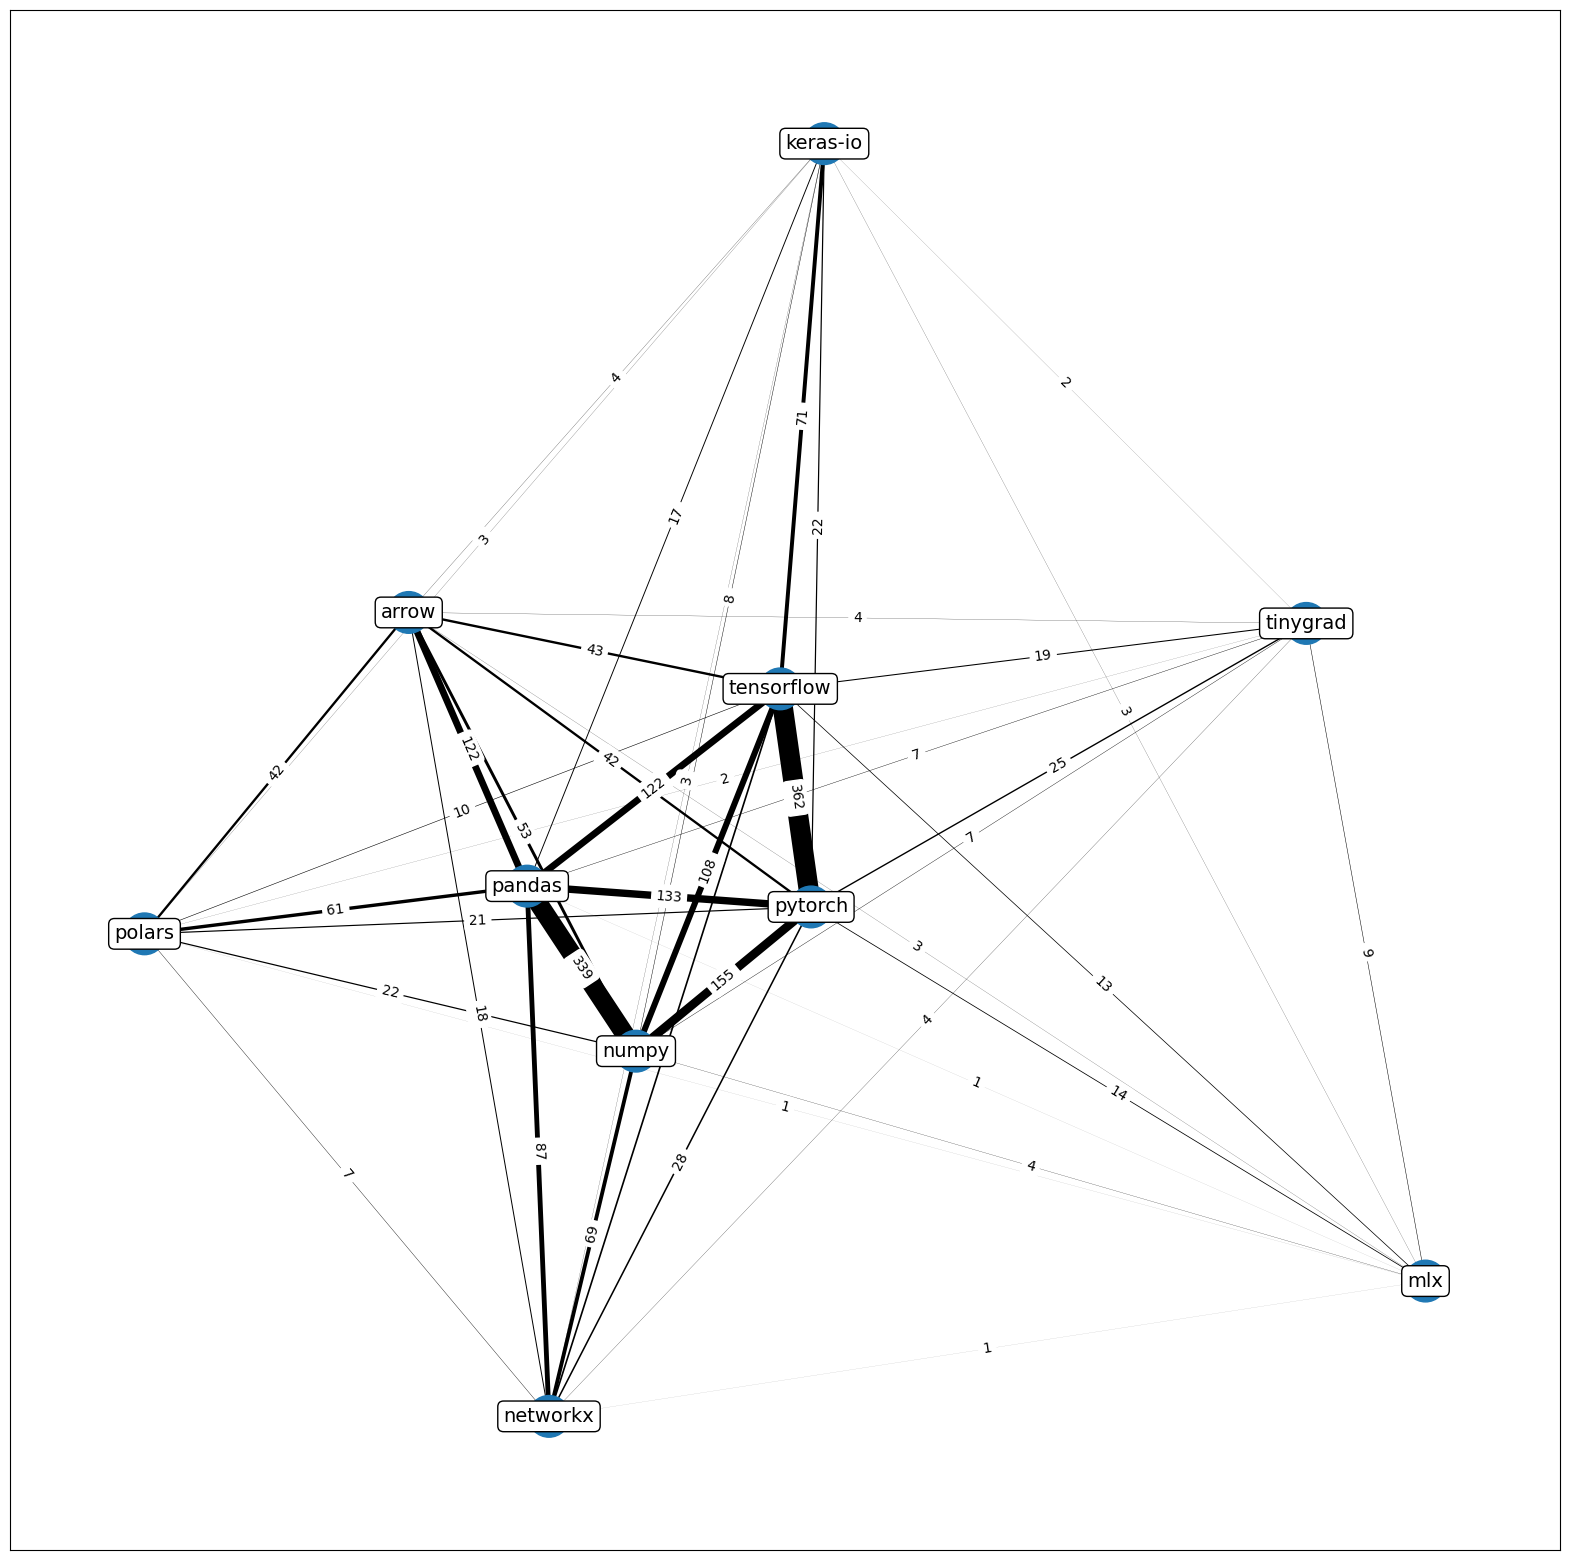

In [14]:
plot_networkx_graph(repo_common_contributors)

### Math Repositories: Plotly Graph

In [15]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

### Takeaways - Math Category

- From the graph, we can observe that some repository pairs have large number of common pull request contributors like `(pytorch, tensorflow)` having 358, and `(numpy, pandas)` having 337. The graph also indicates communities of repositories. The cluster including `numpy`, `pandas`, `tensorflow`, `pytorch` suggestes these repositories are closely related likely due to their roles in data science, machine learning and AI development.
- `arrow` and `networkx` are also connected to this group but to a lesser degree. 
- Repositories like `mlx` and `tinygrad` have very less of common pull request contributors when compared to other projects.

## Natural Language Processing Respositories

In [16]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('nlp')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [17]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25511, 25514, 25515, 25505, 25512, 25516, 25507, 25506, 25510, 25509, 25508, 25513]
['transformers', 'spacy', 'nltk', 'allennlp', 'gensim', 'corenlp', 'deepspeech', 'fasttext', 'sentence-transformers', 'opennmt', 'opennlp', 'cogcomp-nlp']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [18]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25511,transformers,https://github.com/huggingface/transformers,0102ef5a-1700-0000-0000-000000000000,99414
1,25511,transformers,https://github.com/huggingface/transformers,0100267a-1c00-0000-0000-000000000000,99466
2,25511,transformers,https://github.com/huggingface/transformers,01059429-5600-0000-0000-000000000000,99490
3,25511,transformers,https://github.com/huggingface/transformers,01017155-aa00-0000-0000-000000000000,99411
4,25511,transformers,https://github.com/huggingface/transformers,0103d975-f900-0000-0000-000000000000,99784
...,...,...,...,...,...
31689,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01005ef5-6d00-0000-0000-000000000000,33948
31690,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002540-ee00-0000-0000-000000000000,33951
31691,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002747-4b00-0000-0000-000000000000,33952
31692,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002747-4b00-0000-0000-000000000000,33953


In [19]:
df_melted_pr = get_melted_df(pr_contrib)

In [20]:
df_melted_pr.head()

,repo_name,cntrb_id,number
11,transformers,01000000-1100-0000-0000-000000000000,2
16,fasttext,01000002-3c00-0000-0000-000000000000,1
22,spacy,01000002-3c00-0000-0000-000000000000,5
29,gensim,01000004-cf00-0000-0000-000000000000,1
40,fasttext,01000006-6900-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [21]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [22]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 5):
    print(key, value)

01000000-1100-0000-0000-000000000000 ['transformers']
01000002-3c00-0000-0000-000000000000 ['fasttext', 'spacy']
01000004-cf00-0000-0000-000000000000 ['gensim']
01000006-6900-0000-0000-000000000000 ['fasttext', 'gensim']
01000009-bb00-0000-0000-000000000000 ['gensim']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [23]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [24]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('fasttext', 'spacy') 13
('fasttext', 'gensim') 10
('fasttext', 'transformers') 16
('corenlp', 'transformers') 8
('allennlp', 'corenlp') 1


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [25]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('fasttext', 'spacy', 13), ('fasttext', 'gensim', 10), ('fasttext', 'transformers', 16), ('corenlp', 'transformers', 8), ('allennlp', 'corenlp', 1)]


### NLP Repositories: Networkx Graph

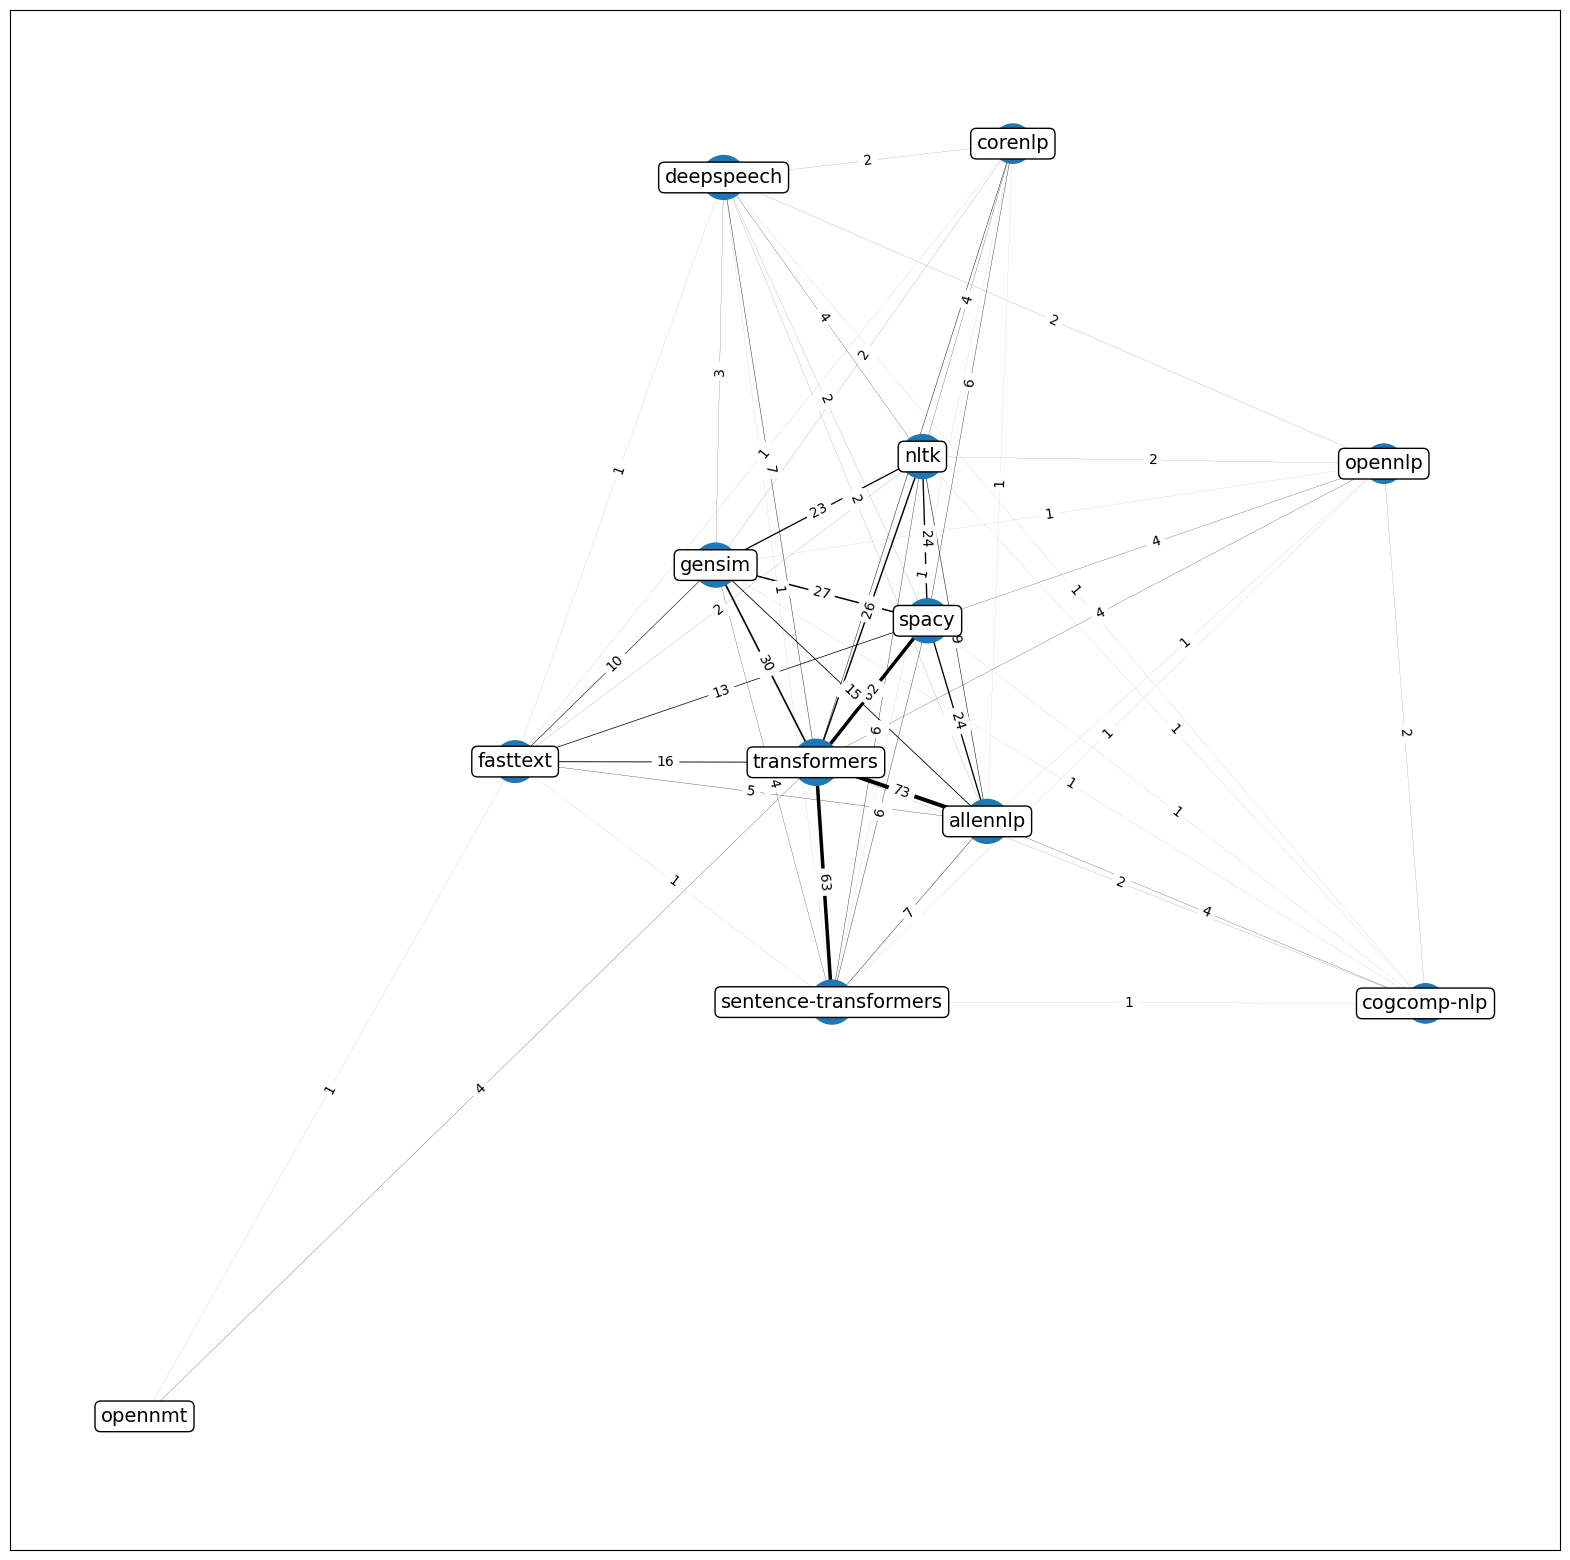

In [26]:
plot_networkx_graph(repo_common_contributors)

### NLP Repositories: Plotly Graph

In [27]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

### Takwaways - NLP Category

- From the graph, we can observe that some repository pairs have large number of common pull request contributors like `(transformers, allennlp)` having 73, and `(transformers, sentence-transformers)` having 62.
- `transformers` and `sentence-transformers` share a common foundation in the transformer architecture which explains the large number of shared common contributors between them.
- `nltk` and `spacy` are also connected to this group but to a lesser degree and fastext is also connected to the group but less number of shared PR contributors.
- `opennmt` is very less connected to other repositories in the NLP space because it is highly specialized in neural machine translation. Contributors to `opennmt` are typically those with a specific interest in machine translation, rather than general NLP tasks.

## Personal Assistant Repositories

In [28]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('personal_assistants')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [29]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25518, 25519, 25523, 25522, 25520, 25521, 25517]
['mycroft-core', 'open-assistant', 'rhasspy', 'ovos-core', 'jarvis', 'leon', 'porcupine']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [30]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,0103ff84-cf00-0000-0000-000000000000,45451
1,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,010017e4-8c00-0000-0000-000000000000,45473
2,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,01003293-ef00-0000-0000-000000000000,45657
3,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,01000c46-bf00-0000-0000-000000000000,45393
4,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,0102f65a-0500-0000-0000-000000000000,45280
...,...,...,...,...,...
6225,25517,porcupine,https://github.com/picovoice/porcupine,0100058a-0500-0000-0000-000000000000,39808
6226,25517,porcupine,https://github.com/picovoice/porcupine,01000027-9900-0000-0000-000000000000,39834
6227,25517,porcupine,https://github.com/picovoice/porcupine,0100d78d-d400-0000-0000-000000000000,39836
6228,25517,porcupine,https://github.com/picovoice/porcupine,0102f65a-0500-0000-0000-000000000000,5200402


In [31]:
df_melted_pr = get_melted_df(pr_contrib)

In [32]:
df_melted_pr.head()

,repo_name,cntrb_id,number
3,open-assistant,01000000-e300-0000-0000-000000000000,2
9,mycroft-core,01000004-9400-0000-0000-000000000000,2
16,mycroft-core,01000009-4500-0000-0000-000000000000,1
21,jarvis,01000027-9900-0000-0000-000000000000,31
23,mycroft-core,01000027-9900-0000-0000-000000000000,9


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [33]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [34]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 5):
    print(key, value)

01000000-e300-0000-0000-000000000000 ['open-assistant']
01000004-9400-0000-0000-000000000000 ['mycroft-core']
01000009-4500-0000-0000-000000000000 ['mycroft-core']
01000027-9900-0000-0000-000000000000 ['jarvis', 'mycroft-core', 'open-assistant', 'porcupine']
01000073-5000-0000-0000-000000000000 ['mycroft-core']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [35]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [36]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('jarvis', 'mycroft-core') 2
('jarvis', 'open-assistant') 2
('jarvis', 'porcupine') 1
('mycroft-core', 'open-assistant') 2
('mycroft-core', 'porcupine') 3


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [37]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('jarvis', 'mycroft-core', 2), ('jarvis', 'open-assistant', 2), ('jarvis', 'porcupine', 1), ('mycroft-core', 'open-assistant', 2), ('mycroft-core', 'porcupine', 3)]


### Personal Assistants Repositories: Networkx Graph

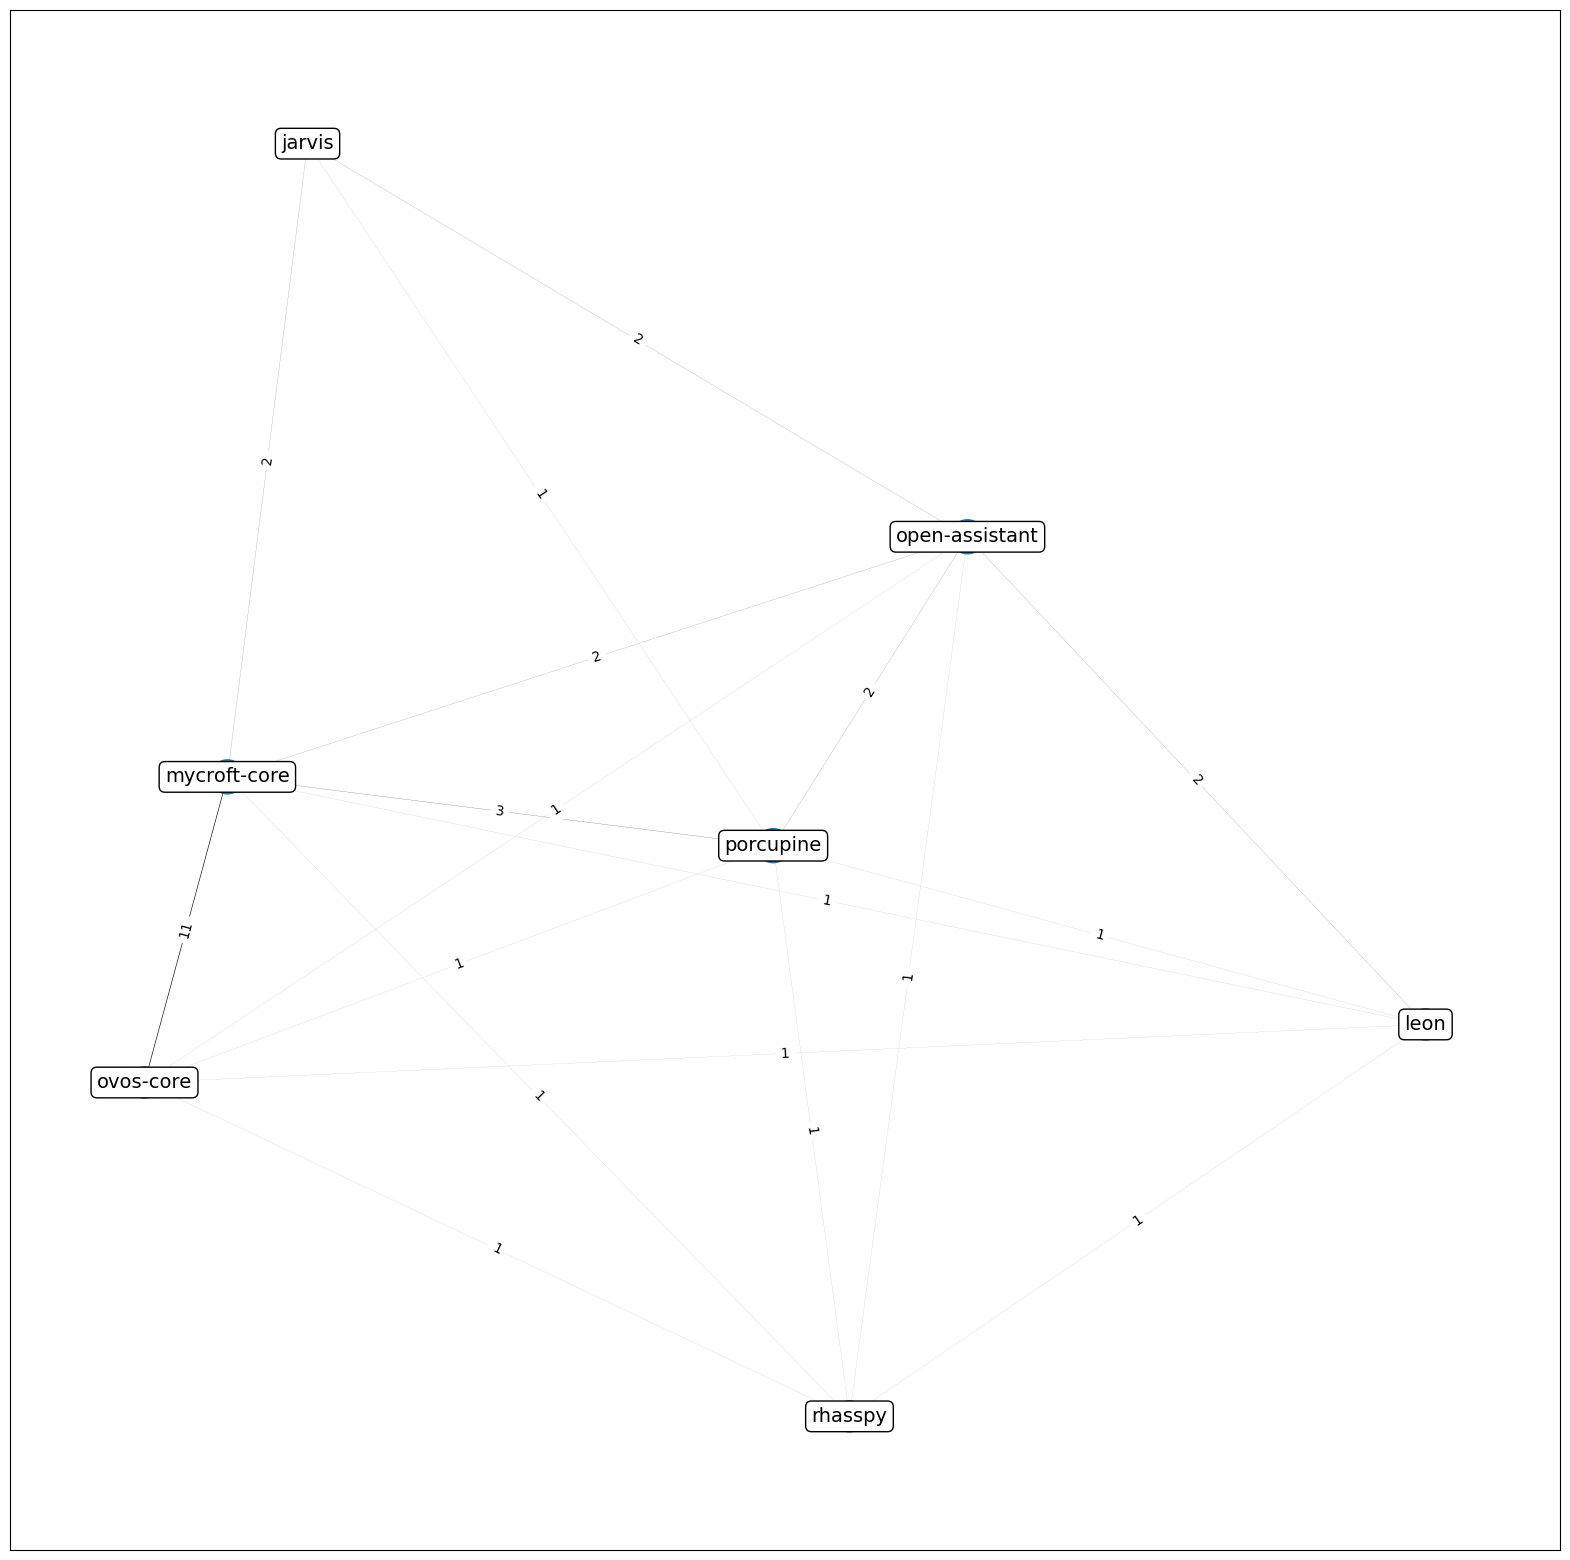

In [38]:
plot_networkx_graph(repo_common_contributors)

### Personal Assistant Repositories: Plotly Graph

In [39]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

### Takwaways - Personal Assistants Category

- Most of the repositories have very less shared contributors in the Personal Assistants space. `mycroft-core` and `ovos-core` is the only pair with good number of shared pull request contributors having 11. This is because `ovos-core` was created as a community-driven fork of `mycroft-core`, building upon the original Mycroft platform.
- `porcupine` and `open-assistant` are also connected to all other repositories but to a lesser extent. 
- `leon` and `rhasspy` are connected to all repositories except to jarvis.
- Also, `jarvis` is the repository with very less shared contributors with connections only to `open-assistant`, `porcupine` and `mycroft-core`. This is due to its focus on command-line-based interaction on Linux, MacOs and Windows, simplicity, and narrow scope.

## Large Language Models Repositories

In [40]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('llm')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [41]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25511, 25533, 25525, 25530, 25524, 25528, 25532, 25529, 25481, 25527]
['transformers', 'datasets', 'trl', 'deepspeed', 'bitsandbytes', 'mistral-common', 'llama', 'text-to-text-transfer-transformer', 'instructlab', 'gemma']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [42]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25511,transformers,https://github.com/huggingface/transformers,0102ef5a-1700-0000-0000-000000000000,99414
1,25511,transformers,https://github.com/huggingface/transformers,0100267a-1c00-0000-0000-000000000000,99466
2,25511,transformers,https://github.com/huggingface/transformers,01059429-5600-0000-0000-000000000000,99490
3,25511,transformers,https://github.com/huggingface/transformers,01017155-aa00-0000-0000-000000000000,99411
4,25511,transformers,https://github.com/huggingface/transformers,0103d975-f900-0000-0000-000000000000,99784
...,...,...,...,...,...
27856,25527,gemma,https://github.com/google-deepmind/gemma,01096b2f-d500-0000-0000-000000000000,6754672
27857,25527,gemma,https://github.com/google-deepmind/gemma,010038a5-5b00-0000-0000-000000000000,3213328
27858,25527,gemma,https://github.com/google-deepmind/gemma,01076655-0100-0000-0000-000000000000,32234
27859,25527,gemma,https://github.com/google-deepmind/gemma,01005bc2-7800-0000-0000-000000000000,32238


In [43]:
df_melted_pr = get_melted_df(pr_contrib)

In [44]:
df_melted_pr.head()

,repo_name,cntrb_id,number
8,transformers,01000000-1100-0000-0000-000000000000,2
14,instructlab,01000008-1200-0000-0000-000000000000,2
28,transformers,0100000a-0700-0000-0000-000000000000,2
29,trl,0100000a-0700-0000-0000-000000000000,1
31,datasets,0100000e-0c00-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [45]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [46]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 5):
    print(key, value)

01000000-1100-0000-0000-000000000000 ['transformers']
01000008-1200-0000-0000-000000000000 ['instructlab']
0100000a-0700-0000-0000-000000000000 ['transformers', 'trl']
0100000e-0c00-0000-0000-000000000000 ['datasets', 'transformers']
0100000f-8900-0000-0000-000000000000 ['transformers']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [47]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [48]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('transformers', 'trl') 88
('datasets', 'transformers') 241
('bitsandbytes', 'datasets') 12
('bitsandbytes', 'transformers') 35
('bitsandbytes', 'trl') 13


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [49]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('transformers', 'trl', 88), ('datasets', 'transformers', 241), ('bitsandbytes', 'datasets', 12), ('bitsandbytes', 'transformers', 35), ('bitsandbytes', 'trl', 13)]


### LLM Repositories: Networkx Graph

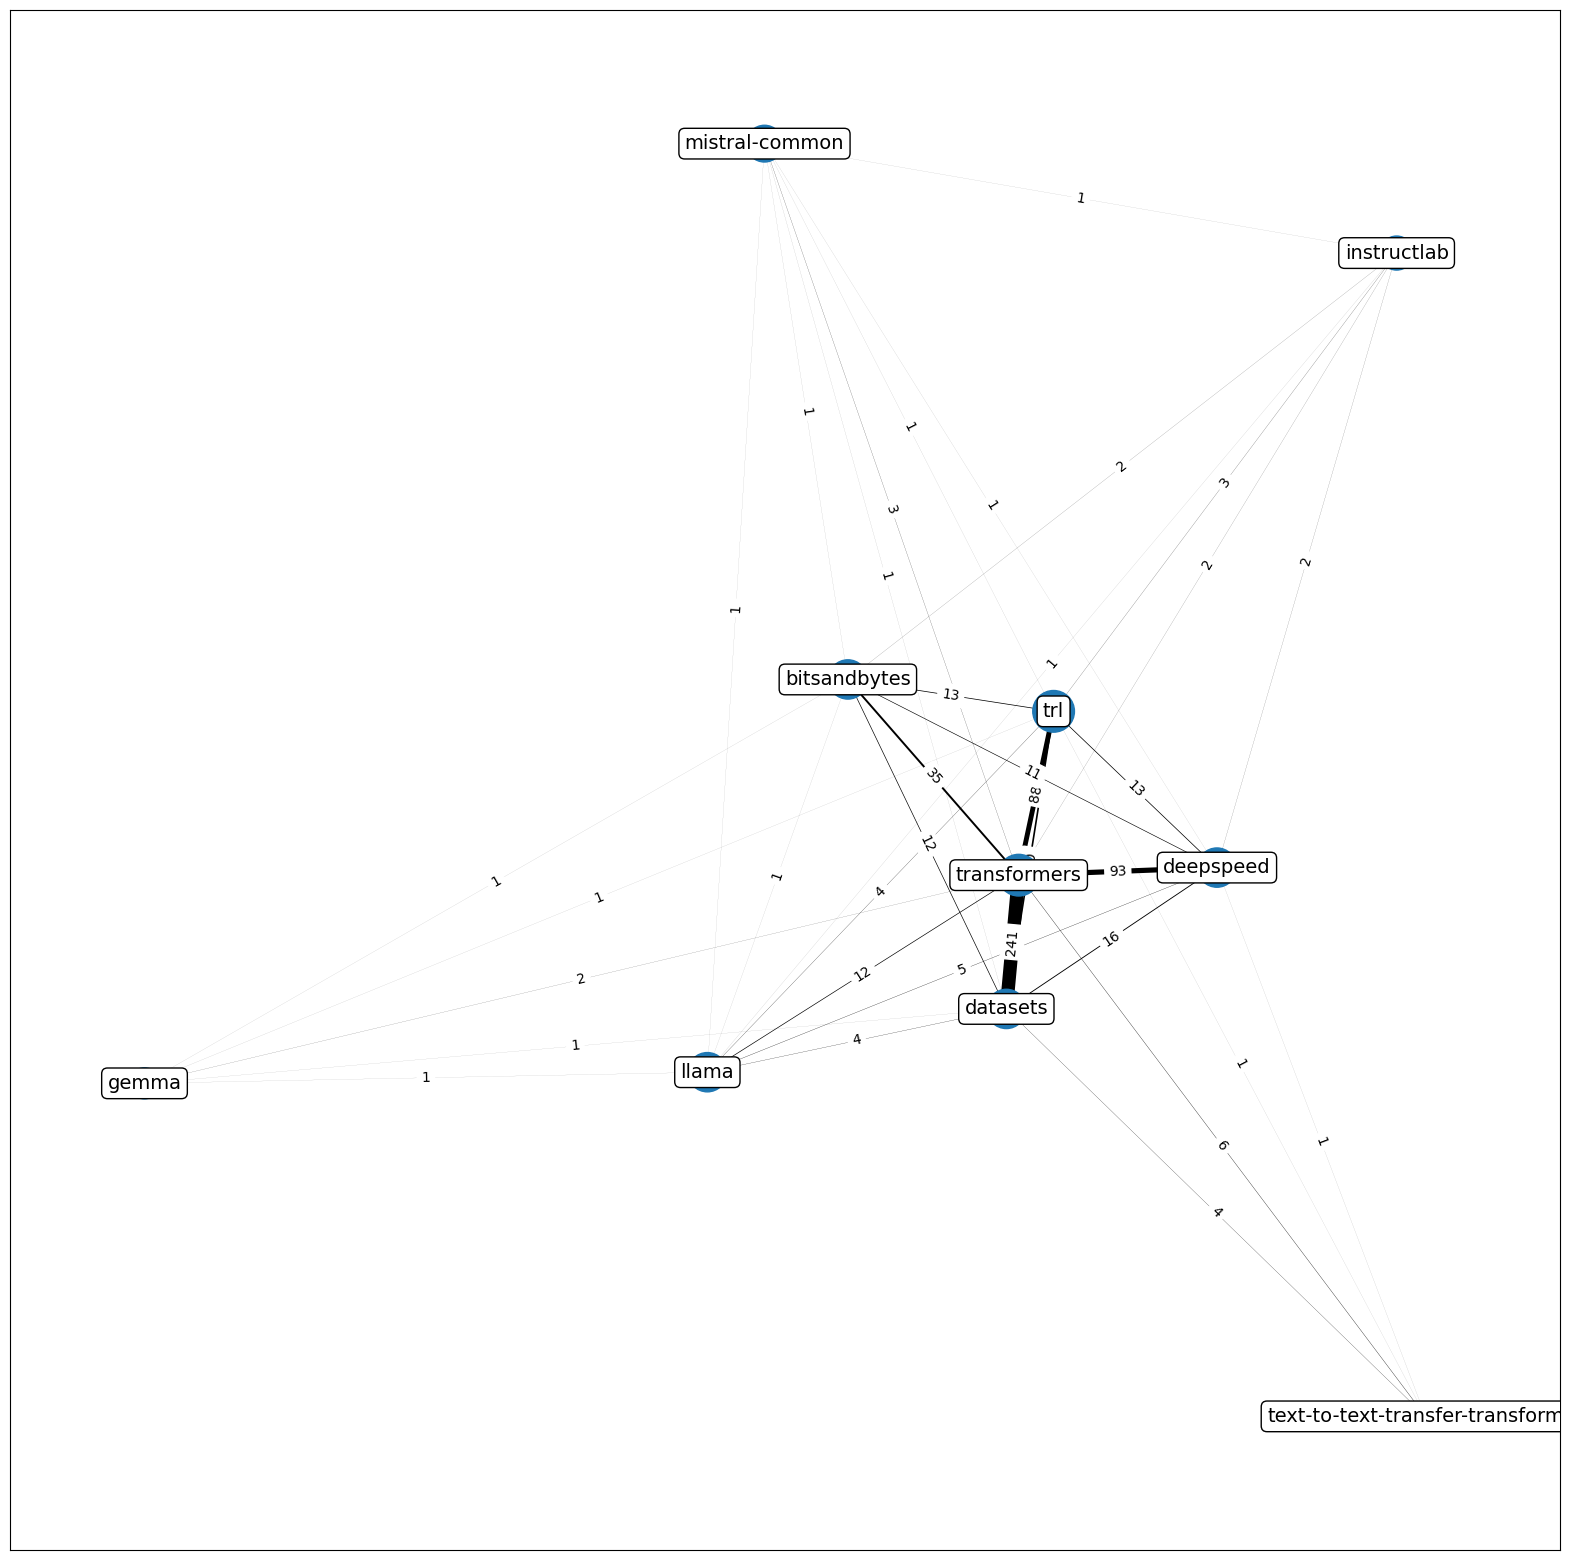

In [50]:
plot_networkx_graph(repo_common_contributors)

### LLM Repositories: Plotly Graph

In [51]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

### Takwaways - LLMs Category

- The repository pairs have large number of common PR contributors like `(datasets, transformers)` having 237,  `(transformers, deepspeed)` having 90, and `(transformers, trl)` having 81 act as central repositories in the LLMs space.
- The close relationship between `transformers`, `datasets`, and `trl` is because they are `huggigface` repositories and the usage of shared techniques and models.
- The large number of shared contributors between `transformers` and `deepspeed` is because deepspeed is often used to enhace the training of large models like those in transformers library.
- Repositories like `gemma` and `text-to-text-transfer-transformer` have very less of common pull request contributors when compared to other projects.
- The reasons could be as `text-to-text-transfer-transformer` (T5) was designed with a focus on a particular methodology for handling diverse NLP tasks by treating all tasks as text-to-text problems and less shared contributors in `gemma` could be due to different developement teams and was developed by google as an oraganization.
- `mistral` and `instructlab` are also connected to most of the repositories but to a lesser degree.

## Generative AI Repositories

In [52]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('gen_ai')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [53]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25543, 25541, 25537, 25546, 25534, 25540, 25538, 25545, 25535, 25542, 25536, 25539]
['imagen-pytorch', 'langchain', 'llama_index', 'lora', 'nemo', 'peft', 'semantic-kernel', 'chroma', 'milvus', 'qdrant', 'promptsource', 'stable-diffusion-webui']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [54]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,010237d9-4400-0000-0000-000000000000,34255
1,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,0100f47c-2d00-0000-0000-000000000000,34271
2,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,01012a1b-b400-0000-0000-000000000000,34223
3,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,0100cc6a-0d00-0000-0000-000000000000,34225
4,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,01012ee0-f000-0000-0000-000000000000,34226
...,...,...,...,...,...
64841,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,010018ee-3400-0000-0000-000000000000,111540
64842,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,01042c97-cf00-0000-0000-000000000000,91043
64843,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100389b-1300-0000-0000-000000000000,112011
64844,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100028c-ff00-0000-0000-000000000000,111722


In [55]:
df_melted_pr = get_melted_df(pr_contrib)

In [56]:
df_melted_pr.head()

,repo_name,cntrb_id,number
2,langchain,01000001-5a00-0000-0000-000000000000,1
15,llama_index,01000001-5b00-0000-0000-000000000000,1
26,langchain,01000002-3c00-0000-0000-000000000000,2
39,llama_index,01000002-6400-0000-0000-000000000000,1
50,langchain,01000004-c300-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [57]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [58]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 5):
    print(key, value)

01000001-5a00-0000-0000-000000000000 ['langchain']
01000001-5b00-0000-0000-000000000000 ['llama_index']
01000002-3c00-0000-0000-000000000000 ['langchain']
01000002-6400-0000-0000-000000000000 ['llama_index']
01000004-c300-0000-0000-000000000000 ['langchain']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [59]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [60]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('langchain', 'peft') 14
('langchain', 'llama_index') 289
('langchain', 'nemo') 13
('langchain', 'qdrant') 13
('langchain', 'stable-diffusion-webui') 19


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [61]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('langchain', 'peft', 14), ('langchain', 'llama_index', 289), ('langchain', 'nemo', 13), ('langchain', 'qdrant', 13), ('langchain', 'stable-diffusion-webui', 19)]


### GenAI Repositories: Networkx Graph

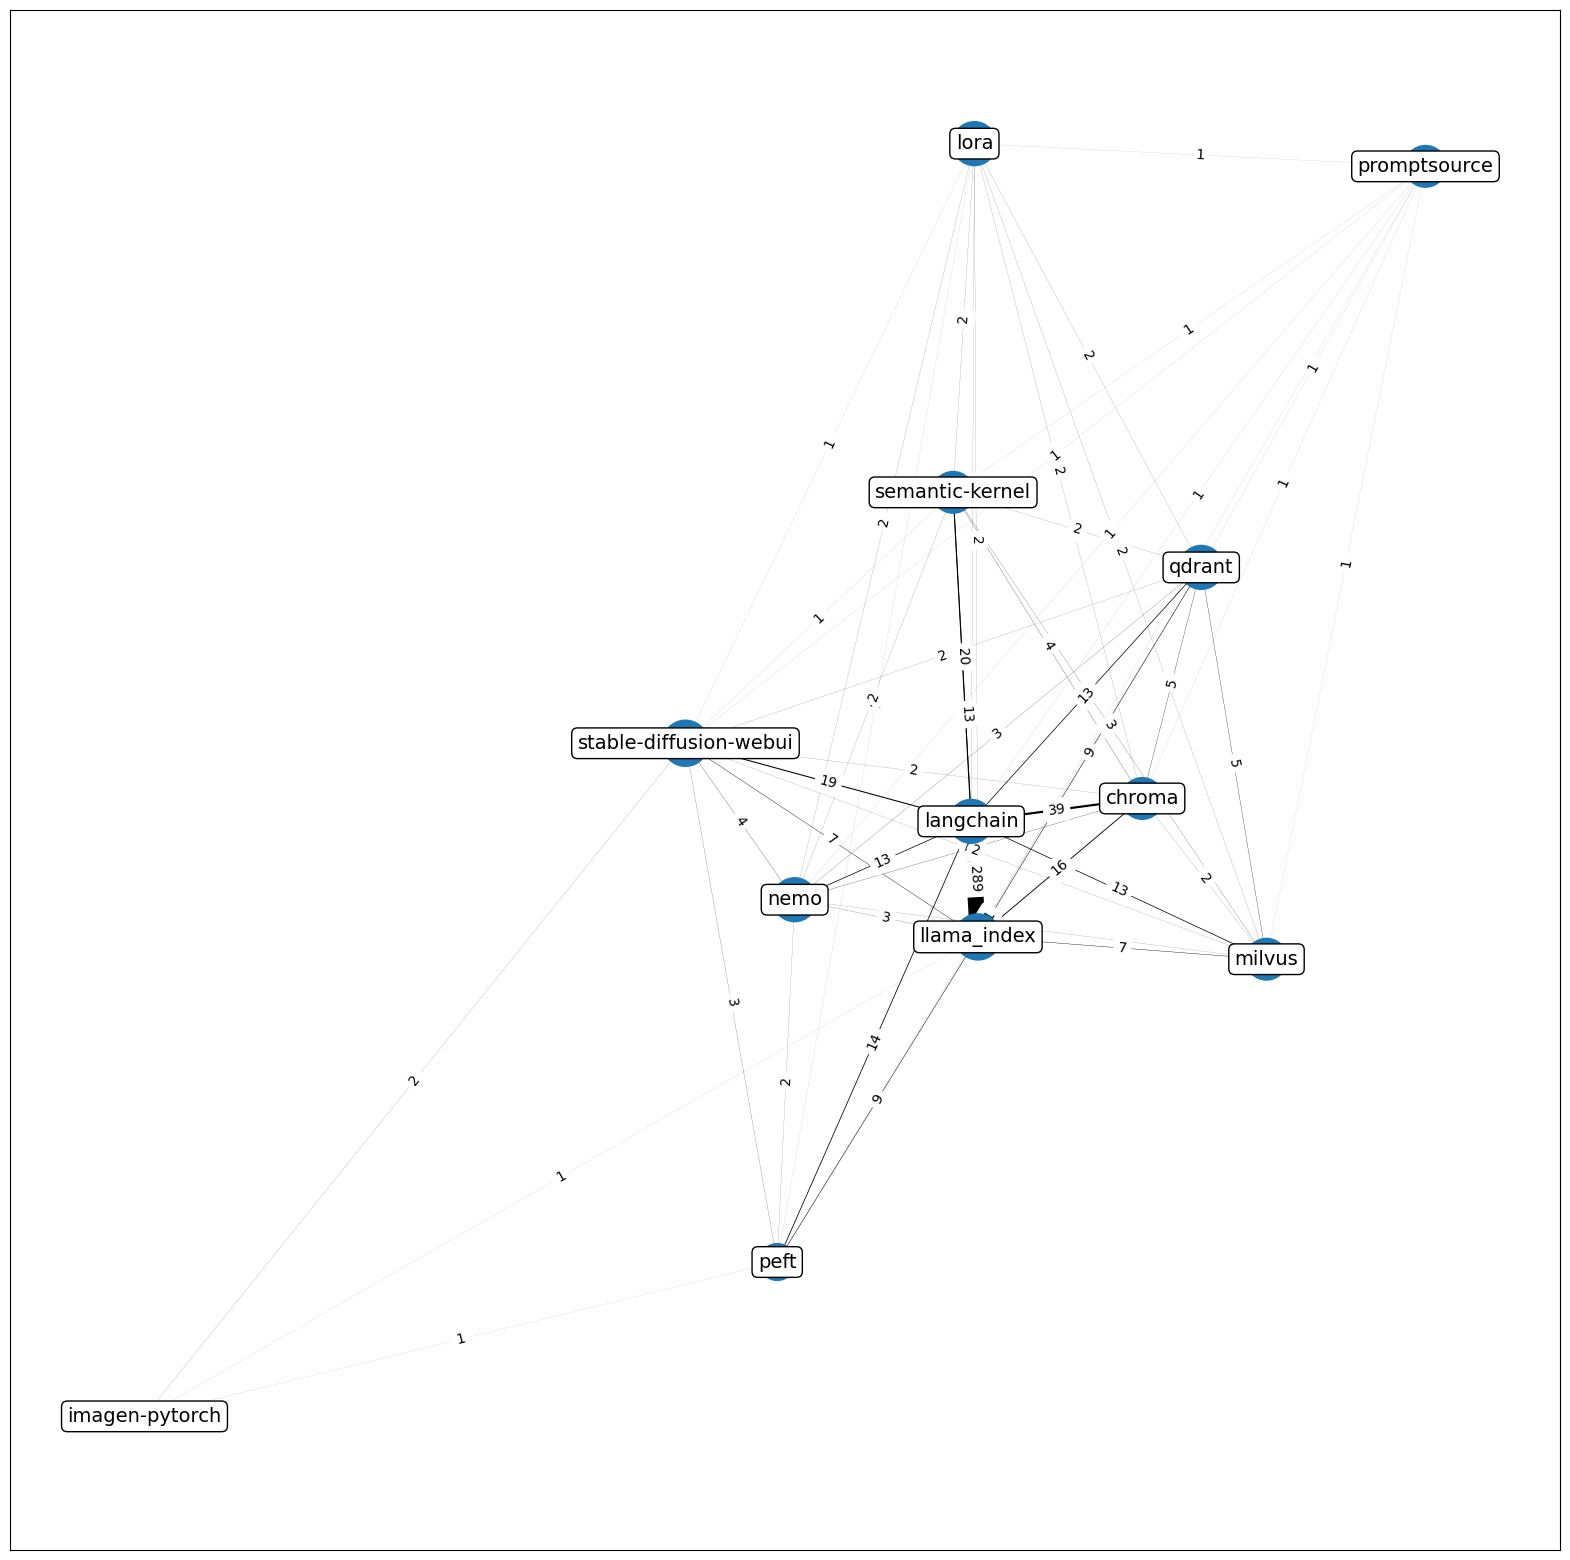

In [62]:
plot_networkx_graph(repo_common_contributors)

### GenAI Repositories: Plotly Graph

In [63]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

### Takwaways - GenAI Category

- The repository pair `(llama_index, langchain)` having 281 as large number of common pull request contributors acting as the key or central repositories in the GenAI space because both LlamaIndex and LangChain are involved in building tools for improving the usability and functionality of language models, particularly for applications like retrieval-augmented generation (RAG), knowledge management, and large-scale information retrieval.
- Repositories like `propmtsource` share very less number of common contributors and `imagen-pytorch` is too far the group of other repositories and only have common contributors with `peft`, `stable-diffusion-webui` and `llama_index` as it's related to image generation models. It provides an implementation of Imagen, a model for generating high-quality images from text descriptions. 

## Combining All Categories

In [64]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

for key in data.keys():
    repo_git_set.extend(data.get(key))

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [65]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25495, 25498, 25497, 25501, 25500, 25504, 25503, 25557, 25502, 25499, 25511, 25514, 25515, 25505, 25512, 25516, 25507, 25506, 25510, 25509, 25508, 25513, 25518, 25519, 25523, 25522, 25520, 25521, 25517, 25511, 25533, 25525, 25530, 25524, 25528, 25532, 25529, 25481, 25527, 25543, 25541, 25537, 25546, 25534, 25540, 25538, 25545, 25535, 25542, 25536, 25539]
['numpy', 'tensorflow', 'networkx', 'pytorch', 'keras-io', 'tinygrad', 'pandas', 'polars', 'arrow', 'mlx', 'transformers', 'spacy', 'nltk', 'allennlp', 'gensim', 'corenlp', 'deepspeech', 'fasttext', 'sentence-transformers', 'opennmt', 'opennlp', 'cogcomp-nlp', 'mycroft-core', 'open-assistant', 'rhasspy', 'ovos-core', 'jarvis', 'leon', 'porcupine', 'transformers', 'datasets', 'trl', 'deepspeed', 'bitsandbytes', 'mistral-common', 'llama', 'text-to-text-transfer-transformer', 'instructlab', 'gemma', 'imagen-pytorch', 'langchain', 'llama_index', 'lora', 'nemo', 'peft', 'semantic-kernel', 'chroma', 'milvus', 'qdrant', 'promptsource', 'stab

### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [66]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25495,numpy,https://github.com/numpy/numpy,01000180-1a00-0000-0000-000000000000,145407
1,25495,numpy,https://github.com/numpy/numpy,0100c1fe-eb00-0000-0000-000000000000,145434
2,25495,numpy,https://github.com/numpy/numpy,010160db-fd00-0000-0000-000000000000,145460
3,25495,numpy,https://github.com/numpy/numpy,01007897-6600-0000-0000-000000000000,145437
4,25495,numpy,https://github.com/numpy/numpy,0100067d-2c00-0000-0000-000000000000,230310
...,...,...,...,...,...
343778,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,010018ee-3400-0000-0000-000000000000,111540
343779,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,01042c97-cf00-0000-0000-000000000000,91043
343780,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100389b-1300-0000-0000-000000000000,112011
343781,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100028c-ff00-0000-0000-000000000000,111722


In [67]:
df_melted_pr = get_melted_df(pr_contrib)

In [68]:
df_melted_pr.head()

,repo_name,cntrb_id,number
48,transformers,01000000-1100-0000-0000-000000000000,4
95,tensorflow,01000000-5000-0000-0000-000000000000,3
135,polars,01000000-8900-0000-0000-000000000000,18
179,open-assistant,01000000-e300-0000-0000-000000000000,2
216,langchain,01000001-5a00-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [69]:
contributorGraph = get_contributor_graph(df_melted_pr)

In [70]:
# let's print some items in contributorGraph to check the key, value pairs
for key, value in islice(contributorGraph.items(), 5):
    print(key, value)

01000000-1100-0000-0000-000000000000 ['transformers']
01000000-5000-0000-0000-000000000000 ['tensorflow']
01000000-8900-0000-0000-000000000000 ['polars']
01000000-e300-0000-0000-000000000000 ['open-assistant']
01000001-5a00-0000-0000-000000000000 ['langchain']


Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [71]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

In [72]:
# let's print some items in commonRepoContributorsCount to check the key, value pairs
for key, value in islice(commonRepoContributorsCount.items(), 5):
    print(key, value)

('fasttext', 'langchain') 6
('fasttext', 'spacy') 13
('langchain', 'spacy') 24
('fasttext', 'gensim') 10
('pytorch', 'tensorflow') 362


Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [73]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

print(repo_common_contributors[:5])

[('fasttext', 'langchain', 6), ('fasttext', 'spacy', 13), ('langchain', 'spacy', 24), ('fasttext', 'gensim', 10), ('pytorch', 'tensorflow', 362)]


### All Category Repositories: Networkx Graph

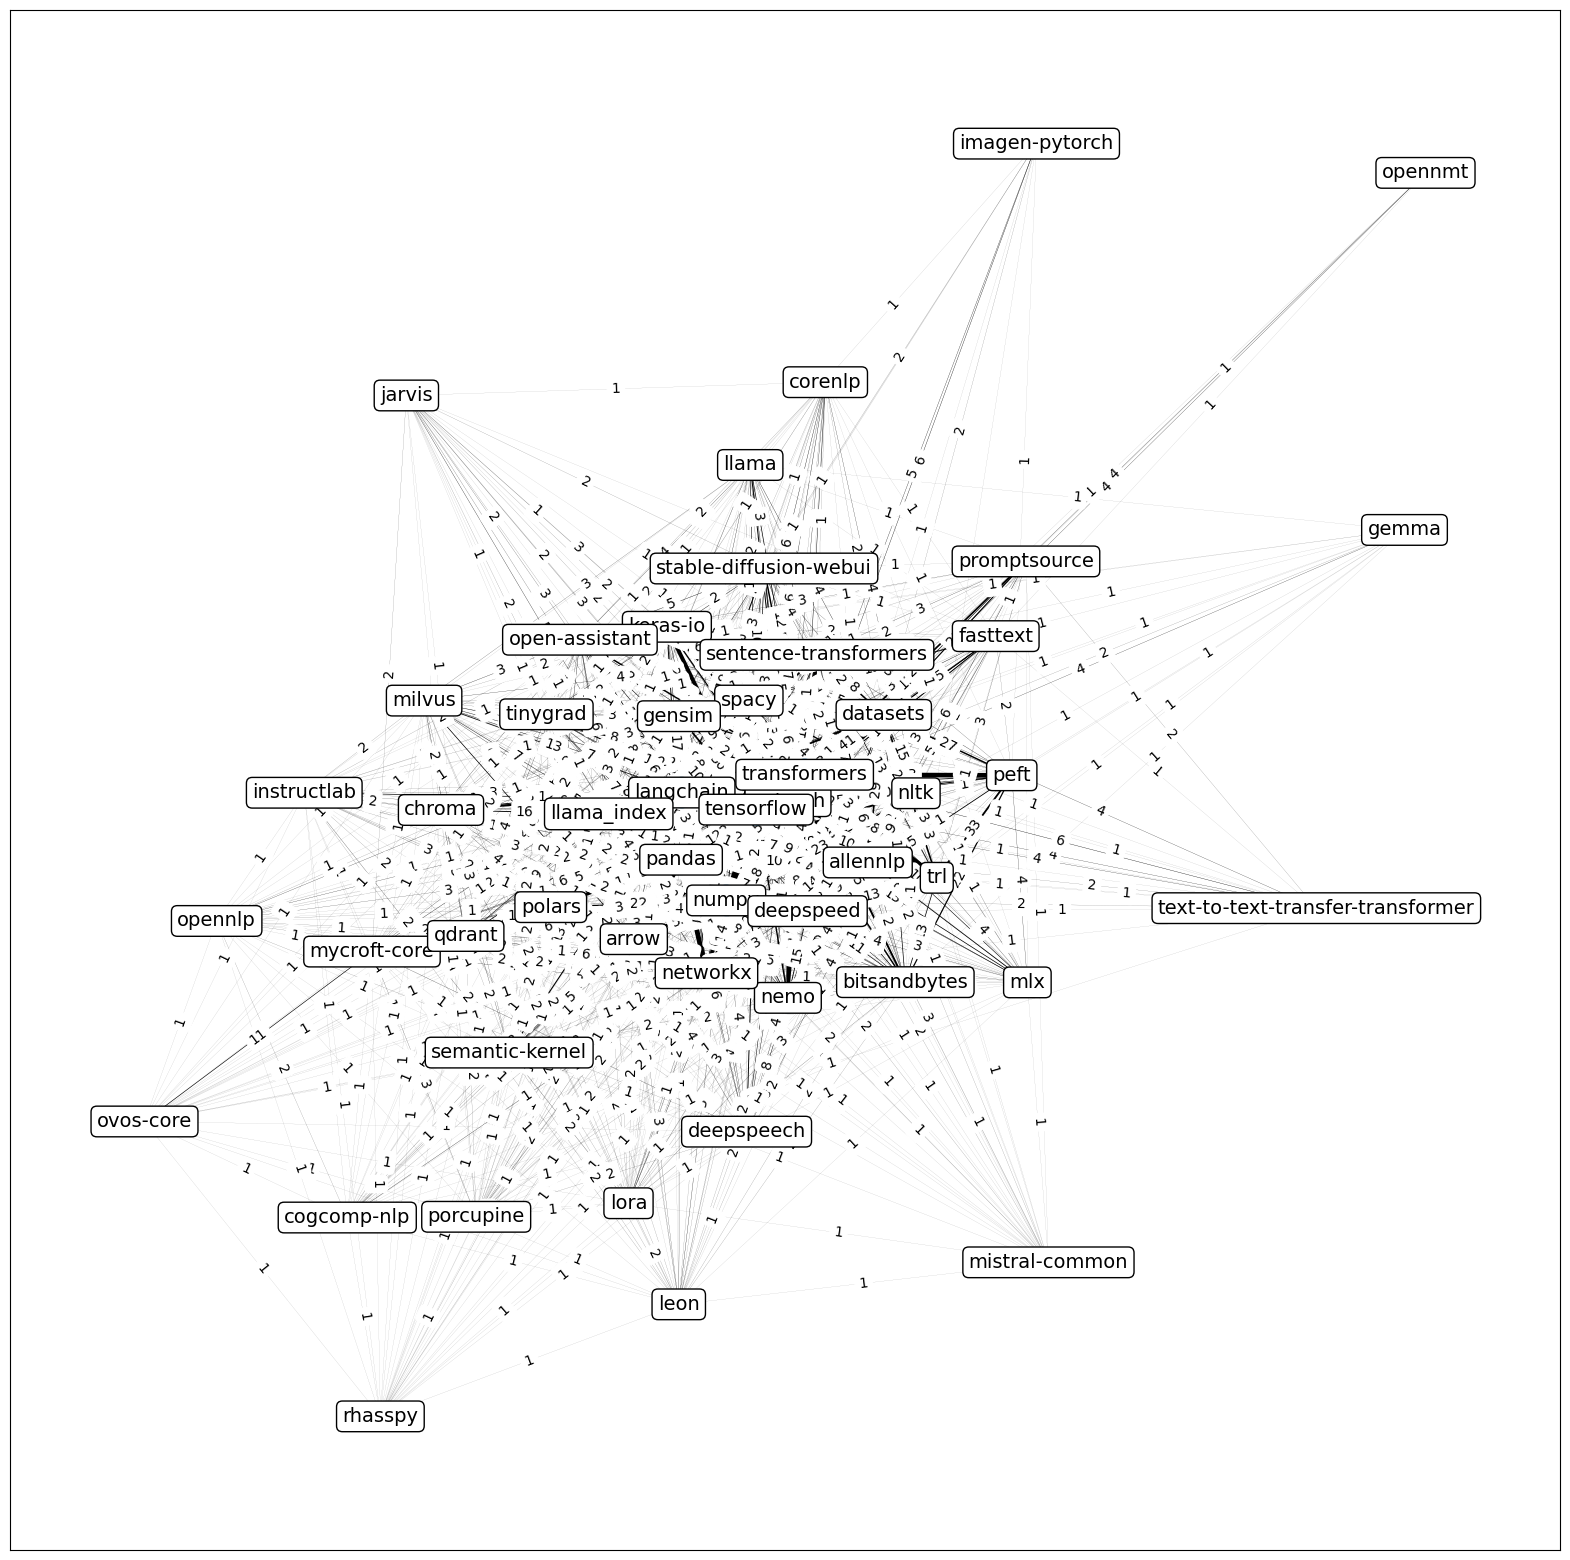

In [74]:
plot_networkx_graph(repo_common_contributors, node_size_factor=10)

### All Category Repositories: Plotly Graph

In [75]:
fig = get_plotly_graph(repo_common_contributors, node_size_factor=5)
fig.write_image("all_categories_repositories_plotly.png")
fig.show()

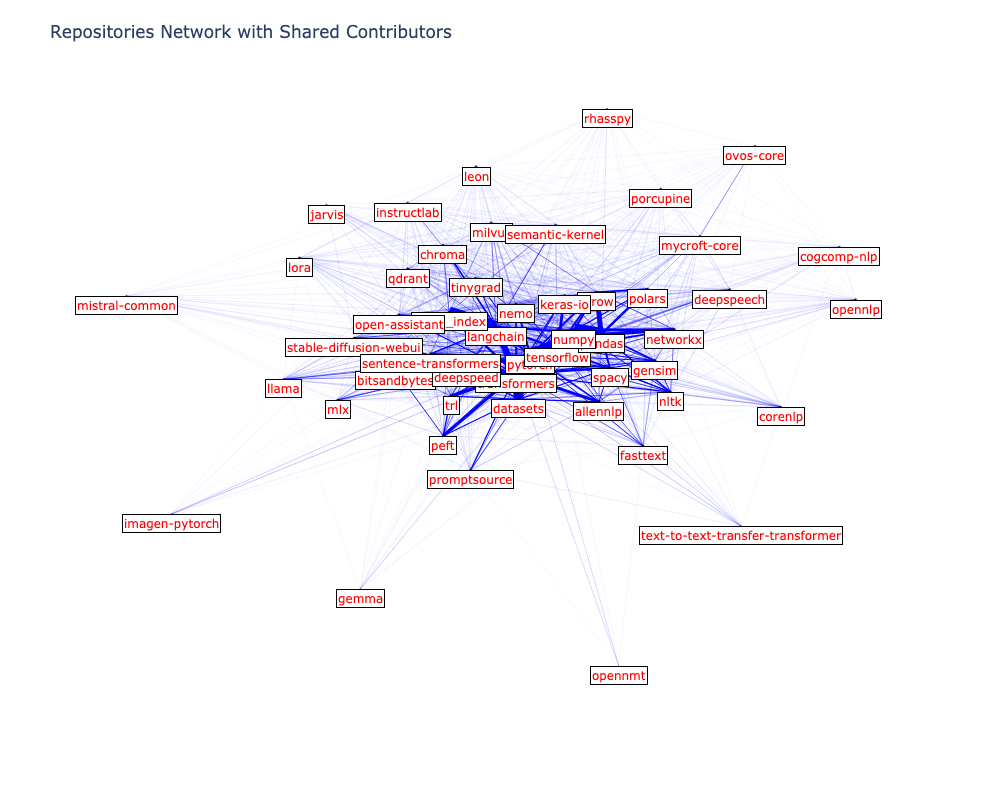

In [76]:
Image('all_categories_repositories_plotly.png')

Let's try to visualize the top repository pairs with highest number of PR common contributors.

In [77]:
fig = get_repo_pairs_with_highest_common_contributors(repo_common_contributors)
fig.write_image("repo_pairs_with_highest_common_contributors.png")
fig.show()

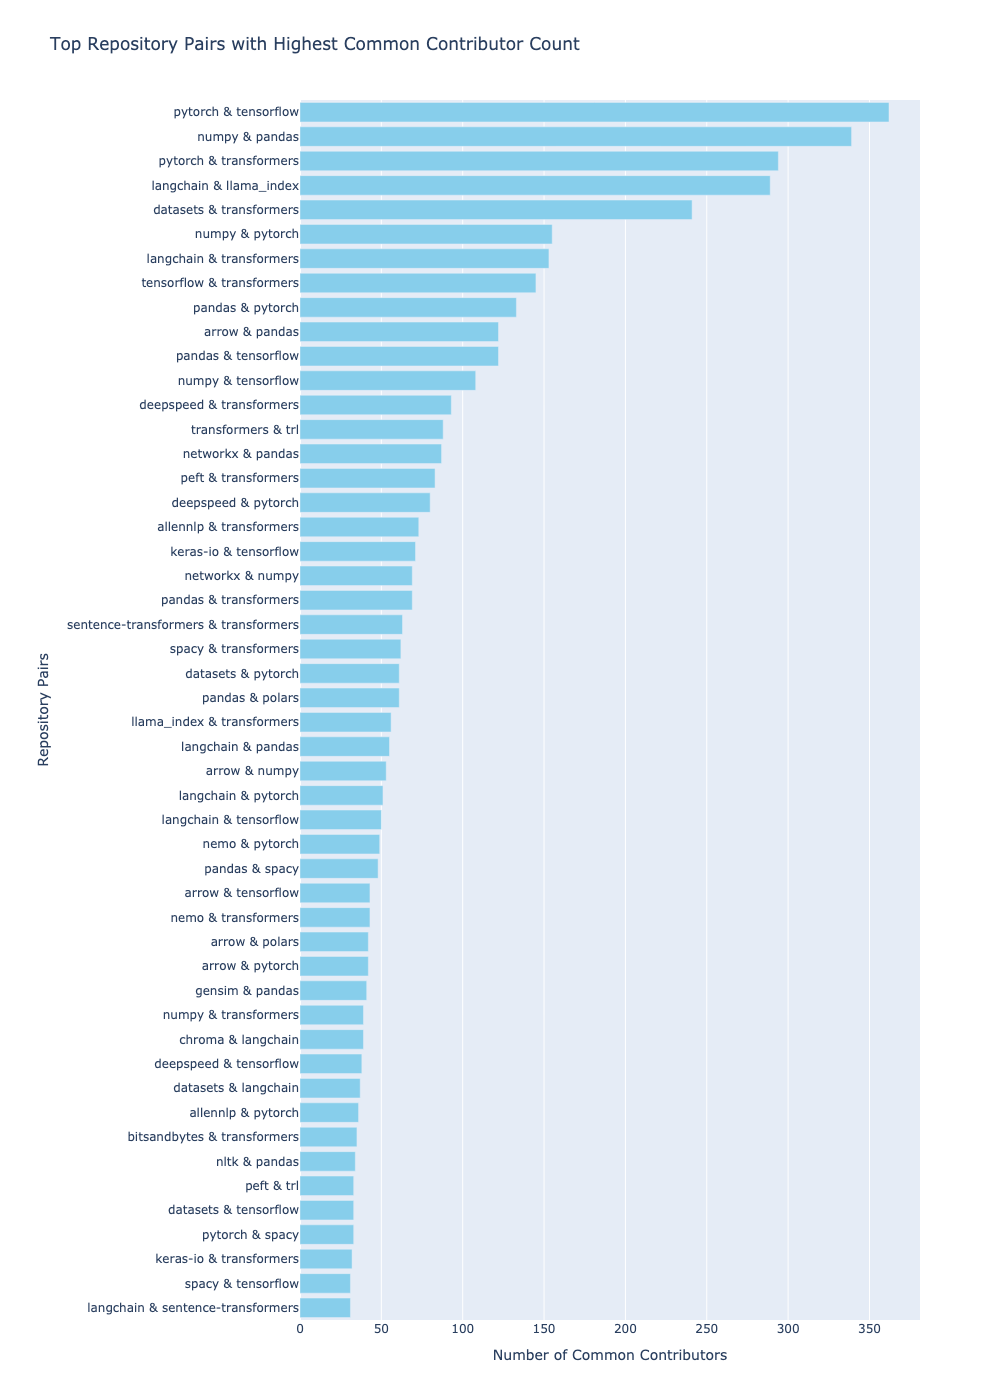

In [78]:
Image('repo_pairs_with_highest_common_contributors.png')

## Takeaways from the combination of all categories

- From the plotly graph we can a group or cluster of repositories like `numpy, pandas, tensorflow, pytorch, spacy, transformers, langchain` etc are the central repositories. This means they are the key projects in most of the projects that fall under AI/ML space.
- Projects like `gemma`, `imagen-pytorch`, and `opennmt` are far away from the main cluster but they are also connected with less degree.
- `pytorch` from math and `transformers` from nlp have the cross-category interaction with 290 common PR contributors.
- `langchain` from GenAI and `transformers` from NLP have 150 common PR contributors.
  
### 1. **Math**:
  - From the graph, we can observe that some repository pairs have large number of common pull request contributors like `(pytorch, tensorflow)` having 358, and `(numpy, pandas)` having 337. The graph also indicates communities of repositories. The cluster including `numpy`, `pandas`, `tensorflow`, `pytorch` suggestes these repositories are closely related likely due to their roles in data science, machine learning and AI development.
  - `arrow` and `networkx` are also connected to this group but to a lesser degree. 
  - Repositories like `mlx` and `tinygrad` have very less of common pull request contributors when compared to other projects.

### 2. **NLP**:
  - From the graph, we can observe that some repository pairs have large number of common pull request contributors like `(transformers, allennlp)` having 73, and `(transformers, sentence-transformers)` having 62.
  - `transformers` and `sentence-transformers` share a common foundation in the transformer architecture which explains the large number of shared common contributors between them.
  - `nltk` and `spacy` are also connected to this group but to a lesser degree and fastext is also connected to the group but less number of shared PR contributors.
  - `opennmt` is very less connected to other repositories in the NLP space because it is highly specialized in neural machine translation. Contributors to `opennmt` are typically those with a specific interest in machine translation, rather than general NLP tasks.

### 3. **Personal Assistants**:
  - Most of the repositories have very less shared contributors in the Personal Assistants space. `mycroft-core` and `ovos-core` is the only pair with good number of shared pull request contributors having 11. This is because `ovos-core` was created as a community-driven fork of `mycroft-core`, building upon the original Mycroft platform.
  - `porcupine` and `open-assistant` are also connected to all other repositories but to a lesser extent. 
  - `leon` and `rhasspy` are connected to all repositories except to jarvis.
  - Also, `jarvis` is the repository with very less shared contributors with connections only to `open-assistant`, `porcupine` and `mycroft-core`. This is due to its focus on command-line-based interaction on Linux, MacOs and Windows, simplicity, and narrow scope.

### 4. **LLM (Large Language Models)**:
  - The repository pairs have large number of common PR contributors like `(datasets, transformers)` having 237,  `(transformers, deepspeed)` having 90, and `(transformers, trl)` having 81 act as central repositories in the LLMs space.
  - The close relationship between `transformers`, `datasets`, and `trl` is because they are `huggigface` repositories and the usage of shared techniques and models.
  - The large number of shared contributors between `transformers` and `deepspeed` is because deepspeed is often used to enhace the training of large models like those in transformers library.
  - Repositories like `gemma` and `text-to-text-transfer-transformer` have very less of common pull request contributors when compared to other projects.
  - The reasons could be as `text-to-text-transfer-transformer` (T5) was designed with a focus on a particular methodology for handling diverse NLP tasks by treating all tasks as text-to-text problems and less shared contributors in `gemma` could be due to different developement teams and was developed by google as an oraganization.
  - `mistral` and `instructlab` are also connected to most of the repositories but to a lesser degree.
  
### 5. **Gen AI (Generative AI)**:
  - The repository pair `(llama_index, langchain)` having 281 as large number of common pull request contributors acting as the key or central repositories in the GenAI space because both LlamaIndex and LangChain are involved in building tools for improving the usability and functionality of language models, particularly for applications like retrieval-augmented generation (RAG), knowledge management, and large-scale information retrieval.
  - Repositories like `propmtsource` share very less number of common contributors and `imagen-pytorch` is too far the group of other repositories and only have common contributors with `peft`, `stable-diffusion-webui` and `llama_index` as it's related to image generation models. It provides an implementation of Imagen, a model for generating high-quality images from text descriptions. 


These insights highlight how certain libraries and tools are central to multiple areas of AI/ML, serving as a common ground for contributors from diverse domains. In this notebook, all the analysis is done based on the Pull Request Contributors. The same can be applied to Commit, Pull Request Reveiwer Contributors as well.